In [16]:
import flow2graph
from pathlib import Path
import networkx as nx

In [6]:
path_csv = Path("./Datasets/CTU-13-Extended/52.csv.tgz")

ip_malicious = {'147.32.84.165', '147.32.84.191', '147.32.84.192'}
ip_normal = {'147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11'}

In [9]:
dt = flow2graph.NetflowDataset(
        path_csv,
        chunksize=int(1e5),
        ip_malicious=ip_malicious,
        ip_normal=ip_normal
    )

In [14]:
import json
#dt_features = dt.get_features()

print("raw dataset features:\n")
print(json.dumps(dt_features, indent=4, separators=(',', ': ')))

print()

total_flows = dt_features['malicious']['n_flows'] + dt_features['normal']['n_flows'] + dt_features['background']['n_flows']
print(f"ratio malicious : {dt_features['malicious']['n_flows']/total_flows:.3f}")
print(f"ratio normal    : {dt_features['normal']['n_flows']/total_flows:.3f}")
print(f"ratio background: {dt_features['background']['n_flows']/total_flows:.3f}")

raw dataset features:

{
    "malicious": {
        "n_nodes": 3,
        "n_flows": 2029977,
        "flows:": {
            "sum": 2135245838.0,
            "mean": 453.0100888779735,
            "mean_std": 5.416633765921894
        }
    },
    "normal": {
        "n_nodes": 6,
        "n_flows": 116466,
        "flows:": {
            "sum": 51657803.0,
            "mean": 197.771987551362,
            "mean_std": 216.4989572918256
        }
    },
    "background": {
        "n_nodes": 41882,
        "n_flows": 4189408,
        "flows:": {
            "sum": 3200631276.0,
            "mean": 796.8222244799399,
            "mean_std": 678.6354896241679
        }
    }
}

ratio malicious : 0.320
ratio normal    : 0.018
ratio background: 0.661


In [22]:
print("Time window size:", dt._window_time_sec, "seconds")
g_malicious = None
for (i, (g, n_labels)) in enumerate(dt):
        print('---------------------')
        print("Graph", i)
        print(nx.classes.function.info(g))
        print('n_flow_background =', n_labels[flow2graph.Label.background.value])
        print('n_flow_normal     =', n_labels[flow2graph.Label.normal.value])
        print('n_flow_malicious  =', n_labels[flow2graph.Label.malicious.value])
        if n_labels[flow2graph.Label.malicious.value] > 50:
            g_malicious = g
            break
        print()

Time window size: 60 seconds
---------------------
Graph 0
Name: 
Type: DiGraph
Number of nodes: 3195
Number of edges: 6220
Average in degree:   1.9468
Average out degree:   1.9468
n_flow_background = 98230
n_flow_normal     = 1770
n_flow_malicious  = 0

---------------------
Graph 1
Name: 
Type: DiGraph
Number of nodes: 2788
Number of edges: 5445
Average in degree:   1.9530
Average out degree:   1.9530
n_flow_background = 97492
n_flow_normal     = 2508
n_flow_malicious  = 0

---------------------
Graph 2
Name: 
Type: DiGraph
Number of nodes: 2689
Number of edges: 5243
Average in degree:   1.9498
Average out degree:   1.9498
n_flow_background = 98551
n_flow_normal     = 1449
n_flow_malicious  = 0

---------------------
Graph 3
Name: 
Type: DiGraph
Number of nodes: 2666
Number of edges: 5294
Average in degree:   1.9857
Average out degree:   1.9857
n_flow_background = 96286
n_flow_normal     = 3714
n_flow_malicious  = 0

---------------------
Graph 4
Name: 
Type: DiGraph
Number of nodes:

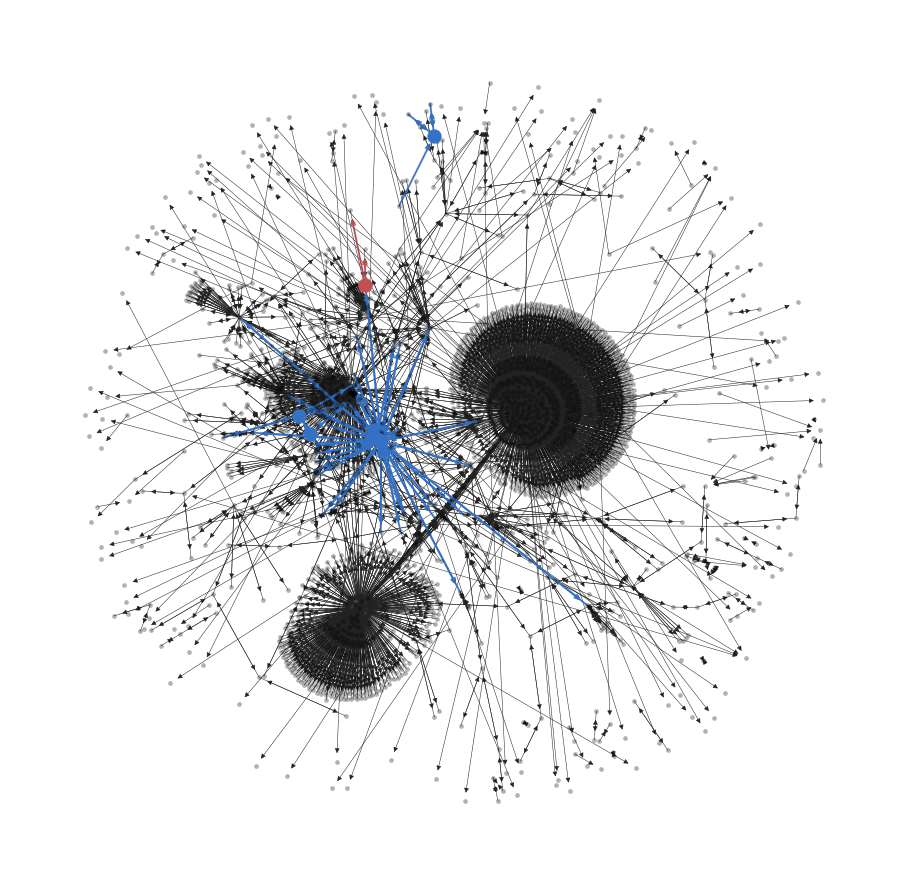

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
flow2graph.plot_flow_graph(g_malicious, ip_malicious, ip_normal)